# Assignment 7: Predictive Model
Predictive Model\
Ismail Abdo Elmaliki\
CS 502 - Predictive Analytics\
Capitol Technology University\
Professor Frank Neugebauer\
February 16, 2022

## Data Understanding

### Info and Head
Right off the bat, we see that there are only two continuos columns: `temp_high` and `temp_low`.

Surprisingly `rain_amt` isn't continuous, so it may contain a value other than numeric. That'll require further investigation.

All columns from `brooklyn_bridge` to `total_cyclists` can be changed into a int64 type by removing the columns and casting all values as `int64`.

The last column called `unamed` appears to have one-null value. That'll require further investigation to determine the next course of action.

For `date` it appears that they correspond to days of April. So the right course of action would be to rename the column to `april` then include only the day values which would have a type of `int64` instead of object.

Finally, for the feature `day` we can apply feature engineering apply label encoding, where days would represent numbers 1 through 7 starting with Sunday.

In [139]:
import pandas as pd
import numpy as np

df = pd.read_csv('04_2017_bike_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 30 non-null     object 
 1   day                  30 non-null     object 
 2   temp_high            30 non-null     float64
 3   temp_low             30 non-null     float64
 4   rain_amt             30 non-null     object 
 5   brooklyn_bridge      30 non-null     object 
 6   manhattan_bridge     30 non-null     object 
 7   williamsburg_bridge  30 non-null     object 
 8   queensboro_bridge    30 non-null     object 
 9   total_cyclists       30 non-null     object 
 10  Unnamed: 10          1 non-null      object 
dtypes: float64(2), object(9)
memory usage: 2.7+ KB


,date,day,temp_high,temp_low,rain_amt,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge,total_cyclists,Unnamed: 10
0,1-Apr,Saturday,46.0,37.0,0,606,"1,446","1,915","1,430","5,397",NaN
1,2-Apr,Sunday,62.1,41.0,0,"2,021","3,943","4,207","2,862","13,033",NaN
2,3-Apr,Monday,63.0,50.0,0.03,"2,470","4,988","5,178","3,689","16,325",NaN
3,4-Apr,Tuesday,51.1,46.0,1.18,723,"1,913","2,279","1,666","6,581",NaN
4,5-Apr,Wednesday,63.0,46.0,0,"2,807","5,276","5,711","4,197","17,991",NaN


### Futher investigating `rain_amt`
Displaying unique values for `rain_amt` appears to display an alphabetic value of `T`. After doing further research in the context of rain amount, T refers to trace - which describes very small amount of rain that results in no measurable accumulation (Oblack, 2019). The article also says that if Trace must be converted to a numerical value, it would equal 0.00.

In [140]:
df['rain_amt'].unique()

array(['0', '0.03', '1.18', '0.73', 'T', '0.02', '0.17', '0.29', '0.11',
       '0.91', '0.34', '0.06'], dtype=object)

### Further investigating `unnamed: 10`
After display unique values of the column `Unnamed: 10` we can breathe easy and proceed with deleting this column knowing it won't affect our predictive model setup later.

In [141]:
df['Unnamed: 10'].unique()

array([nan, ' '], dtype=object)

In [142]:
df.drop(columns='Unnamed: 10', inplace=True)
df.head()

,date,day,temp_high,temp_low,rain_amt,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge,total_cyclists
0,1-Apr,Saturday,46.0,37.0,0,606,"1,446","1,915","1,430","5,397"
1,2-Apr,Sunday,62.1,41.0,0,"2,021","3,943","4,207","2,862","13,033"
2,3-Apr,Monday,63.0,50.0,0.03,"2,470","4,988","5,178","3,689","16,325"
3,4-Apr,Tuesday,51.1,46.0,1.18,723,"1,913","2,279","1,666","6,581"
4,5-Apr,Wednesday,63.0,46.0,0,"2,807","5,276","5,711","4,197","17,991"


## Feature Engineering
Now for the fun part, it's time to update the data step by step. Once we're able to change column values to continuous values, we'll re-examine features `temp_high` through `total_cyclists` for skewness and distribution. From there, we'll determine whether transformations will be necessary.

### Update `date`
We'll be doing the following with `date`:
- changing it's column name from `date` to `day_of_april`
- transforming column data by removing all alphabetical characters and symbols
- casting column values to `int64`

In [143]:
df.rename(columns={'date': 'day_of_april'}, inplace=True)
df['day_of_april'].replace('-Apr', '', regex=True, inplace=True)
df['day_of_april'] = df['day_of_april'].apply(lambda x: int(x))
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   day_of_april         30 non-null     int64  
 1   day                  30 non-null     object 
 2   temp_high            30 non-null     float64
 3   temp_low             30 non-null     float64
 4   rain_amt             30 non-null     object 
 5   brooklyn_bridge      30 non-null     object 
 6   manhattan_bridge     30 non-null     object 
 7   williamsburg_bridge  30 non-null     object 
 8   queensboro_bridge    30 non-null     object 
 9   total_cyclists       30 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ KB


,day_of_april,day,temp_high,temp_low,rain_amt,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge,total_cyclists
0,1,Saturday,46.0,37.0,0,606,"1,446","1,915","1,430","5,397"
1,2,Sunday,62.1,41.0,0,"2,021","3,943","4,207","2,862","13,033"
2,3,Monday,63.0,50.0,0.03,"2,470","4,988","5,178","3,689","16,325"
3,4,Tuesday,51.1,46.0,1.18,723,"1,913","2,279","1,666","6,581"
4,5,Wednesday,63.0,46.0,0,"2,807","5,276","5,711","4,197","17,991"


### Update `day`
For `day` column we'll simply convert days to numbers, with Sunday representing 1 and Saturday representing 7.

In [144]:
# Verify there are no misspellings of days
df['day'].unique() 

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [145]:
df['day'].replace({'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday': 7}, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   day_of_april         30 non-null     int64  
 1   day                  30 non-null     int64  
 2   temp_high            30 non-null     float64
 3   temp_low             30 non-null     float64
 4   rain_amt             30 non-null     object 
 5   brooklyn_bridge      30 non-null     object 
 6   manhattan_bridge     30 non-null     object 
 7   williamsburg_bridge  30 non-null     object 
 8   queensboro_bridge    30 non-null     object 
 9   total_cyclists       30 non-null     object 
dtypes: float64(2), int64(2), object(6)
memory usage: 2.5+ KB


,day_of_april,day,temp_high,temp_low,rain_amt,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge,total_cyclists
0,1,7,46.0,37.0,0,606,"1,446","1,915","1,430","5,397"
1,2,1,62.1,41.0,0,"2,021","3,943","4,207","2,862","13,033"
2,3,2,63.0,50.0,0.03,"2,470","4,988","5,178","3,689","16,325"
3,4,3,51.1,46.0,1.18,723,"1,913","2,279","1,666","6,581"
4,5,4,63.0,46.0,0,"2,807","5,276","5,711","4,197","17,991"


### Update columns `brooklyn_bridge` through `total_cyclists`
With these columns, we'll be removing commas then casting all their values to int.

In [146]:
c = ['brooklyn_bridge', 'manhattan_bridge', 'williamsburg_bridge', 'queensboro_bridge', 'total_cyclists']
df.replace(',', '', regex=True, inplace=True)
for column in c:
    df[column] = df[column].apply(lambda x: int(x))

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   day_of_april         30 non-null     int64  
 1   day                  30 non-null     int64  
 2   temp_high            30 non-null     float64
 3   temp_low             30 non-null     float64
 4   rain_amt             30 non-null     object 
 5   brooklyn_bridge      30 non-null     int64  
 6   manhattan_bridge     30 non-null     int64  
 7   williamsburg_bridge  30 non-null     int64  
 8   queensboro_bridge    30 non-null     int64  
 9   total_cyclists       30 non-null     int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 2.5+ KB


,day_of_april,day,temp_high,temp_low,rain_amt,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge,total_cyclists
0,1,7,46.0,37.0,0,606,1446,1915,1430,5397
1,2,1,62.1,41.0,0,2021,3943,4207,2862,13033
2,3,2,63.0,50.0,0.03,2470,4988,5178,3689,16325
3,4,3,51.1,46.0,1.18,723,1913,2279,1666,6581
4,5,4,63.0,46.0,0,2807,5276,5711,4197,17991


### Update `rain_amt`
We'll be changing values `T` to `0.00`. Then cast all values of `rain_amt` to float

In [147]:
df['rain_amt'].replace('T', '0.00', regex=True, inplace=True)
df['rain_amt'] = df['rain_amt'].apply(lambda x: float(x))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   day_of_april         30 non-null     int64  
 1   day                  30 non-null     int64  
 2   temp_high            30 non-null     float64
 3   temp_low             30 non-null     float64
 4   rain_amt             30 non-null     float64
 5   brooklyn_bridge      30 non-null     int64  
 6   manhattan_bridge     30 non-null     int64  
 7   williamsburg_bridge  30 non-null     int64  
 8   queensboro_bridge    30 non-null     int64  
 9   total_cyclists       30 non-null     int64  
dtypes: float64(3), int64(7)
memory usage: 2.5 KB


,day_of_april,day,temp_high,temp_low,rain_amt,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge,total_cyclists
0,1,7,46.0,37.0,0.00,606,1446,1915,1430,5397
1,2,1,62.1,41.0,0.00,2021,3943,4207,2862,13033
2,3,2,63.0,50.0,0.03,2470,4988,5178,3689,16325
3,4,3,51.1,46.0,1.18,723,1913,2279,1666,6581
4,5,4,63.0,46.0,0.00,2807,5276,5711,4197,17991


### Analyze columns `temp_high` through `total_cyclists`
Now that we've applied feature engineering, it'll be important to re-analyze our data to understand its skewness and distribution.

Looking at the skewness of all values, looks like the only feature that'll require a transformation is `rain_amt`. It's highly right skewed. The rest of the features are moderately skewed and do not require any transformation.

In [148]:
df.skew()

day_of_april           0.000000
day                    0.000000
temp_high              0.381250
temp_low               0.235689
rain_amt               2.659268
brooklyn_bridge       -0.295921
manhattan_bridge      -0.253030
williamsburg_bridge   -0.278956
queensboro_bridge     -0.263878
total_cyclists        -0.283378
dtype: float64

From the box plot, we can clearly see that there are a few outliers that are causing an uneven distribution.

<AxesSubplot:>

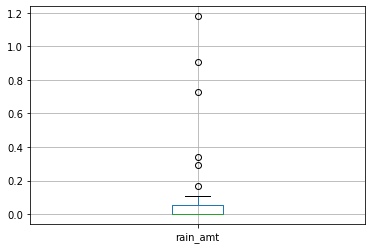

In [149]:
df.boxplot(column='rain_amt')

Applying a log10 transformation doesn't fix the issue at all.

In [150]:
temp_df = df.copy()
temp_df['rain_amt'] = temp_df['rain_amt'].apply(lambda x: np.log10(x))
temp_df['rain_amt'].skew()

nan

We'll go with the winsorize approach, replacing 10% of the lowest values and 30% of the highest values. 

We can see that out skew went from 2.65 to 0.74! So we'll go ahead and making those changes permanent.

In [151]:
from scipy.stats.mstats import winsorize

temp_df = df.copy()
temp_df['rain_amt'] = winsorize(temp_df['rain_amt'], (0.1, 0.3))
temp_df['rain_amt'].skew()

0.7448804862362217

<AxesSubplot:>

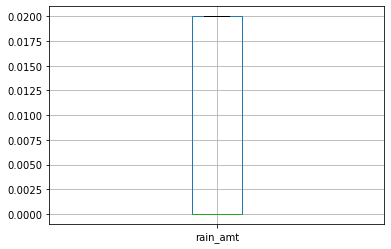

In [152]:
df['rain_amt'] = winsorize(df['rain_amt'], (0.1, 0.3))
df.boxplot(column='rain_amt')

### Remove day and date
With building our model, analyzing the day and date won't make a difference. We'll move forward with dropping them.

In [153]:
df.drop(['day_of_april', 'day'], axis=1, inplace=True)
df.head()

,temp_high,temp_low,rain_amt,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge,total_cyclists
0,46.0,37.0,0.00,606,1446,1915,1430,5397
1,62.1,41.0,0.00,2021,3943,4207,2862,13033
2,63.0,50.0,0.02,2470,4988,5178,3689,16325
3,51.1,46.0,0.02,723,1913,2279,1666,6581
4,63.0,46.0,0.00,2807,5276,5711,4197,17991


In [154]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(df)

sample = model.sample(30)
sample.head()

/Users/IsmailElmaliki/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/IsmailElmaliki/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/IsmailElmaliki/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/IsmailElmaliki/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


,temp_high,temp_low,rain_amt,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge,total_cyclists
0,62.3,51.2,0.0,1901,2672,3894,2205,9318
1,62.4,44.6,0.0,2554,5470,5602,4202,18308
2,63.0,49.7,0.0,2149,4311,4993,3693,15108
3,62.9,49.1,0.0,2134,5757,4367,4472,19652
4,72.6,53.5,0.0,2756,6050,5988,4265,19552


In [155]:
df = pd.concat([df, sample], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp_high            60 non-null     float64
 1   temp_low             60 non-null     float64
 2   rain_amt             60 non-null     float64
 3   brooklyn_bridge      60 non-null     int64  
 4   manhattan_bridge     60 non-null     int64  
 5   williamsburg_bridge  60 non-null     int64  
 6   queensboro_bridge    60 non-null     int64  
 7   total_cyclists       60 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 3.9 KB


In [156]:
df.to_csv('04_2017_bike_data_clean.csv', index=False)

## Prediction Model
Alas, we're done with the feature engineering portion. We can now move on to creating a prediction model for this dataset.

### Linear Regression
For predictors, we'll include all columns except the categorical values `day` and `day_of_april`. Also we'll need to exclude `total_cyclists` since that'll be our target.

With setting up a linear regression model, we can see that the linear regression model score is 1. Meaning the prediction model is perfect and able to accurately predict total_cyclists!

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

predictors = ['temp_high', 'temp_low', 'rain_amt', 'brooklyn_bridge', 'manhattan_bridge', 'williamsburg_bridge', 'queensboro_bridge']
target = ['total_cyclists']

x = df[predictors]
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100)

linear_regression_model = LinearRegression().fit(x_train, y_train)
print(linear_regression_model.score(x_test, y_test))

0.9985300893592584


Let's also test the model and utilize our test data. Comparing our predicted values verus our test values demonstrates that the model indeed accurately predicts `total_cyclists`.

In [158]:
y_pred = linear_regression_model.predict(x_test)

y_test_values = y_test.values.flatten()
y_pred_values = y_pred.flatten()

df_pred = pd.DataFrame({'Actual': y_test_values, 'Predicted': y_pred_values})
df_pred

,Actual,Predicted
0,19355,19179.624685
1,19043,18771.867145
2,10156,10191.114847
3,15827,16343.758571
4,18281,18249.258129
5,20880,20741.939225
6,4896,4900.823389
7,18699,18746.220091
8,23493,23608.088897
9,19652,19682.676974


It's time to evaluate our model. We can see that the 1) mean absolute error, 2) mean squared error, and 3) root mean squared error are very close to 0. This would tell us that our Linear Regression Model is very reliable for predicting `total_cyclists`.

In [159]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_values, y_pred_values))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_values, y_pred_values))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_values, y_pred_values)))

Mean Absolute Error: 147.16695045272414
Mean Squared Error: 49262.8333739287
Root Mean Squared Error: 221.95232229902146


### KNN (KNeighborsRegressor)
Now that we've used LinearRegression, let's compare it to KNN.

So far, it seems that the score for our KNN predictive model is 0.95. Less than our LinearRegressionModel.

Because our dataset is a small size, using a value of 5 for n_neighbors should be a good start.

In [160]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_train)
print(knn.score(x_test, y_test))

0.9710259465972287


We can clearly see using KNN is able to closely predict the values, but not as accurately as our LinearRegression model.

In [161]:
y_pred = knn.predict(x_test)
y_pred_values = y_pred.flatten()

df_pred = pd.DataFrame({'Actual': y_test_values, 'Predicted': y_pred_values})
df_pred

,Actual,Predicted
0,19355,18804.0
1,19043,18398.8
2,10156,10822.2
3,15827,15696.0
4,18281,17221.6
5,20880,20574.4
6,4896,6977.2
7,18699,19450.2
8,23493,23423.0
9,19652,17652.4


We can also clearly see MAE, MSE, and RMSE values are greater than our LinearRegression model. This would indicate the model performance of KNN isn't as accurate as our LinearRegression model.

In [162]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_values, y_pred_values))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_values, y_pred_values))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_values, y_pred_values)))

Mean Absolute Error: 770.0266666666669
Mean Squared Error: 971041.3173333333
Root Mean Squared Error: 985.4142871570989


# Conclusion
Bringing it all together here, we were able to understand our dataset, perform feature engineering to address our feature values, then use Linear Regression and KNN predictive models for our dataset. Linear Regression is the clear predictive model here, and we were able to verify that by comparing our test values to our predicted values. We also made sure to use valuable metrics like mean absolute error, mean squared error, and root mean squared error to further evaluate our model performance.

# References


Oblack, R. (2019, July 3). *What Is a "Trace" of Precipitation?* ThoughtCo. Retrieved February 18, 

&emsp; 2022, from https://www.thoughtco.com/what-is-trace-of-precipitation-3444238